In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.xlsx - Sheet1.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### General Data Pre-Processing:
1. Interpreting Date_of_Journey
2. Making sense of Dep_Time and Arrival_Time
3. Using the Duration feature
4. Handling categorical data
5. Train test split


In [ ]:
weekday = [0,1,2,3,4]


df['journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['is_weekend'] = pd.to_datetime(df['Date_of_Journey']).dt.dayofweek.map(lambda x: 1 if x not in weekday else 0)

df['dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,is_weekend,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,0,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,0,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,0,16,50,21,35


In [ ]:
# ustilizing Duration
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'm' in duration[i]:
            duration[i] = '0h' + duration[i]
        else:
            duration[i] = duration[i] + '0m'
            
    
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'h')[1].split('m')[0]))
    
df['duration_hour'] = duration_hours
df['duration_minute'] = duration_minutes

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,is_weekend,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,0,16,50,21,35,4,45


In [ ]:
cols_to_drop = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']
df.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,is_weekend,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,0,16,50,21,35,4,45


In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# df.drop(df.index[df["Airline"]=="Multiple carriers Premium economy"],inplace=True)
# df.drop(df.index[df["Airline"]=="Jet Airways Business"],inplace=True)
# df.drop(df.index[df["Airline"]=="Vistara Premium economy"],inplace=True)
# df.drop(df.index[df["Airline"]=="Trujet"],inplace=True)

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

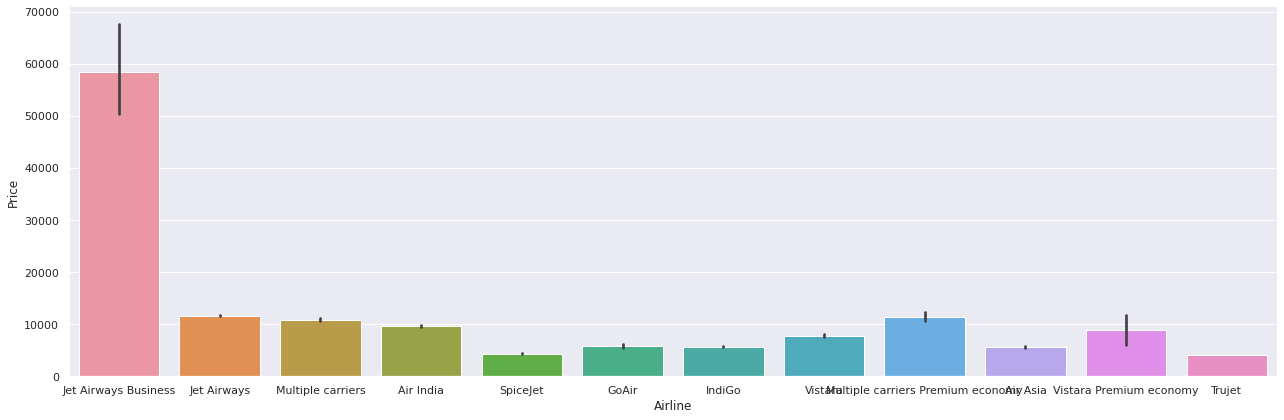

In [ ]:
sns.catplot(x = 'Airline', y = 'Price' , data=df.sort_values(by = 'Price' , ascending=False), height=6, aspect=3, kind='bar');

In [ ]:
# use one hot encoder since the data is Nominal and not ordinal

airline = df[['Airline']]
airline = pd.get_dummies(airline, drop_first=True)



source = df['Source']
destination = df['Destination']

source = pd.get_dummies(source, drop_first=True)
destination = pd.get_dummies(destination, drop_first=True)



In [ ]:
# Route???

# Since there is another column which contains total stops the flight had this cloumn is not useful for us



df['Additional_Info'].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
# majority: No Info -> useless, drop
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

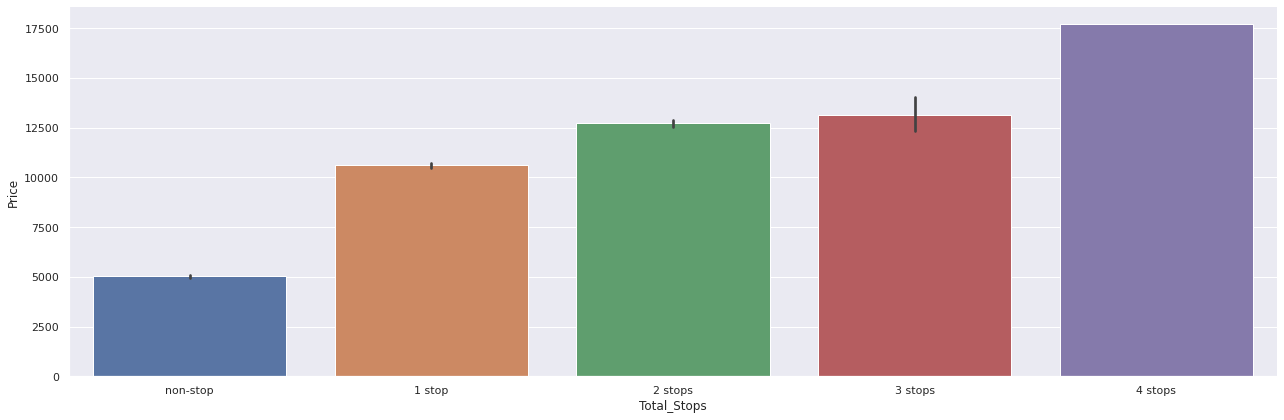

In [ ]:
# Total Stops
sns.catplot(x = 'Total_Stops', y = 'Price',data=df.sort_values('Price',ascending=True), kind='bar', height=6, aspect=3)

In [ ]:
df['Total_Stops'].replace({'non-stop' : 0,
               '1 stop' : 1,
               '2 stops' : 2,
               '3 stops' : 3,
               '4 stops' : 4
              }, inplace = True)

In [ ]:
# combining the encoded DFs
df = pd.concat([df, airline, source, destination], axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,is_weekend,dep_hour,dep_minute,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,1,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,0,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,0,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,0,16,50,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Now we can drop some cols
df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [ ]:
df.dtypes

Total_Stops                                  int64
Price                                        int64
journey_day                                  int64
journey_month                                int64
is_weekend                                   int64
dep_hour                                     int64
dep_minute                                   int64
arrival_hour                                 int64
arrival_minute                               int64
duration_hour                                int64
duration_minute                              int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                 

In [ ]:
# train_test split
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X.shape

(10682, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

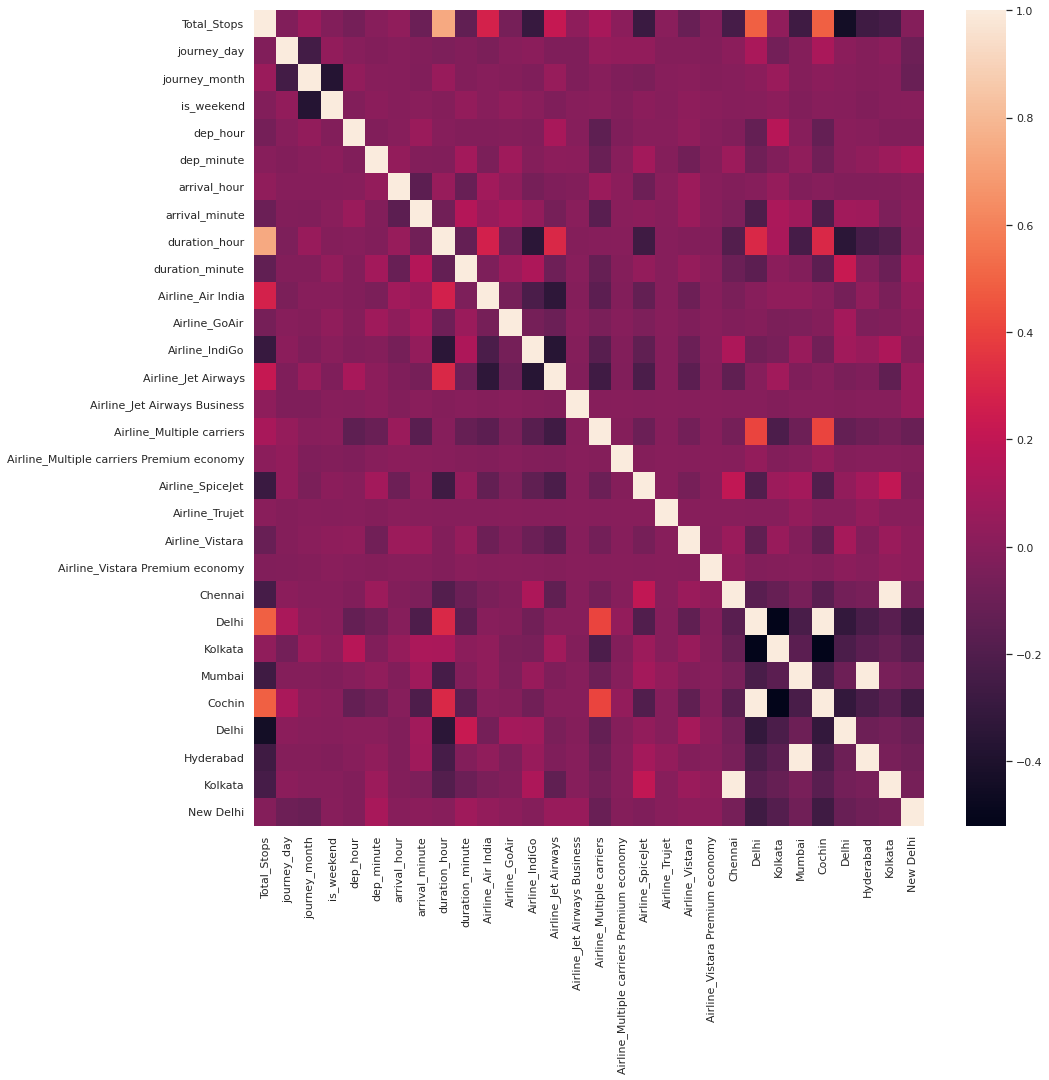

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr())

### Modelling the problem

In [ ]:
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# A function to rule them all
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model = ml_model.fit(X_train, y_train)

    print("Training score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)

    r2score = r2_score(predictions, y_test) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

Model is: RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)
Training score: 0.901822393721308
r2 score is: 0.7973221637306316
MAE:1172.1139960846738
MSE:3238666.2698624744
RMSE:1799.6294812717629


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


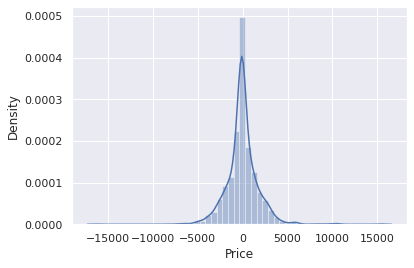

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 700,
                                 min_samples_split = 15,
                                 min_samples_leaf =  1,
                                 max_features = 'auto',
                                 max_depth = 20)

predict(model_rf)


Model is: LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training score: 0.23792285607289976
r2 score is: 0.15597422590042742
MAE:2522.5237738674655
MSE:15776719.516660428
RMSE:3971.9918827535926


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


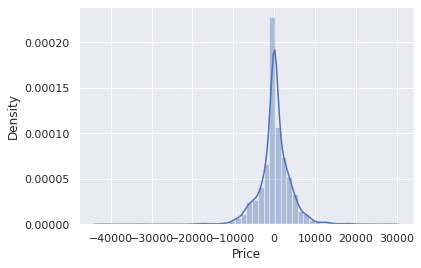

In [ ]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7271340878504435
r2 score is: 0.36736089100862723
MAE:1903.6810183451892
MSE:8227348.18435043
RMSE:2868.335437906527


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


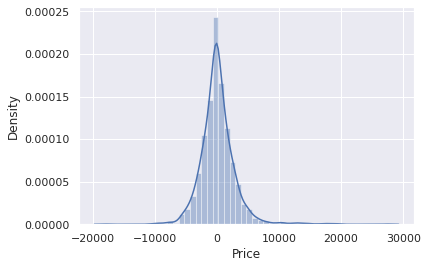

In [ ]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.973765666464632
r2 score is: 0.6843453551441332
MAE:1385.8446524397852
MSE:6181030.2946900865
RMSE:2486.1677929476296


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


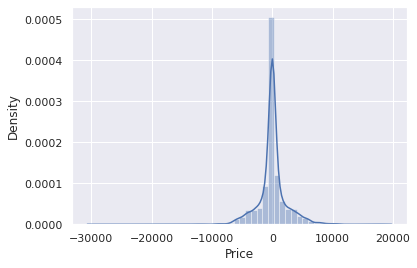

In [ ]:
predict(DecisionTreeRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.7938266354700039
r2 score is: 0.6733432397557724
MAE:1493.7568656118071
MSE:4335135.787983423
RMSE:2082.098890058641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


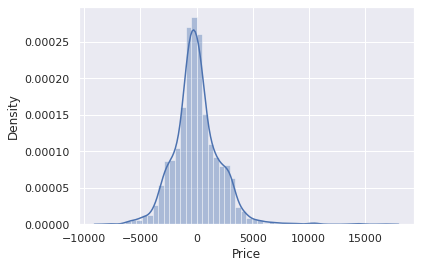

In [ ]:
predict(GradientBoostingRegressor())

In [ ]:
!pip install lightgbm

Model is: LGBMRegressor()
Training score: 0.8692970888464536
r2 score is: 0.7871574760685991
MAE:1306.4385891619006
MSE:3473896.6669790274
RMSE:1863.8392277712762


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


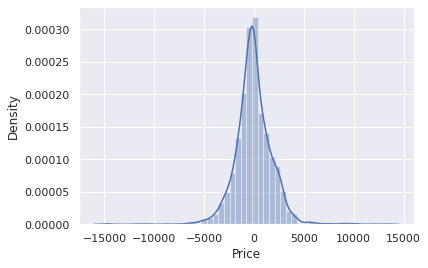

In [ ]:
from lightgbm import LGBMRegressor
predict(LGBMRegressor())

### Tuning the RFRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid = {
    'n_estimators' : [200, 300, 400, 500, 600, 700, 800],
    'max_features':['auto','sqrt'],
    'max_depth':[2**i for i in range(8)],
}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=grid, cv=3, verbose=2,n_jobs=-1)

rf_random.fit(X_train,y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 8, 16, 32, 64,
                                                      128],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800]},
                   verbose=2)

In [ ]:

# best parameter
rf_random.best_params_

{'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 300}

Model is: RandomForestRegressor(max_depth=16, max_features='sqrt', n_estimators=300)
Training score: 0.93178770918299
r2 score is: 0.7581274131003137
MAE:1281.5499489349415
MSE:3553301.0410311893
RMSE:1885.0201699268869


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


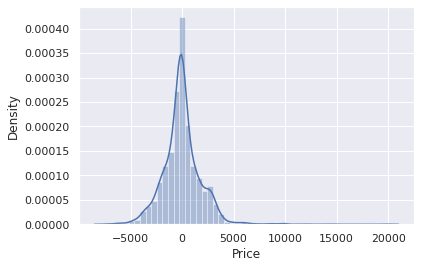

In [ ]:
predict(RandomForestRegressor(**rf_random.best_params_))

In [ ]:
from lightgbm import LGBMRegressor
# lgbm = LGBMRegressor(random_state=42,max_depth=best_max_depth_value,n_estimators=best_n_estimators_value)
lgbm = LGBMRegressor(random_state=42,max_depth=8,n_estimators=300)
lgbm.fit(X_train,y_train)
y_pred_lgbm = lgbm.predict(X_test)
print(' -------------------------- Model used : Light GBM Regressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_lgbm))  
print('MAE: ',mean_absolute_error(y_test,y_pred_lgbm))
print('MSE: ',mean_squared_error(y_test,y_pred_lgbm))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_lgbm)))

 -------------------------- Model used : Light GBM Regressor ------------------
r2 score :  0.8251155478869581
MAE:  1235.5930765889534
MSE:  3306228.080372286
RMSE:  1818.3036271129984
